In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# Loading the data into pandas dataframe

data_url = "https://raw.githubusercontent.com/nishilp/Datascience04/master/data/nba_elo.csv"
raw_data = pd.read_csv(data_url)

In [3]:
# Check total number of rows and columns. This frame has 68324 rows and 24 columns

raw_data.shape

(68324, 24)

In [4]:
# Check rows with missing attribute values

raw_data.isnull().sum(axis=0)

date                  0
season                0
neutral               0
playoff           64044
team1                 0
team2                 0
elo1_pre              0
elo2_pre              0
elo_prob1             0
elo_prob2             0
elo1_post          1191
elo2_post          1191
carm-elo1_pre     63157
carm-elo2_pre     63157
carm-elo1_post    64348
carm-elo2_post    64348
carm-elo_prob1    63157
carm-elo_prob2    63157
carmelo1_pre      67094
carmelo2_pre      67094
carmelo_prob1     67094
carmelo_prob2     67094
score1             1191
score2             1191
dtype: int64

In [5]:
# Dropping columns which has majority of null values

intrim_data = raw_data.drop(columns=['date', 'carm-elo1_pre', 'carm-elo2_pre','carm-elo1_post','carm-elo2_post','carm-elo_prob1','carm-elo_prob2', 'carmelo1_pre','carmelo2_pre','carmelo_prob1','carmelo_prob2','playoff'])

In [6]:
# Check rows with missing attribute values

intrim_data.isnull().sum(axis=0)

season          0
neutral         0
team1           0
team2           0
elo1_pre        0
elo2_pre        0
elo_prob1       0
elo_prob2       0
elo1_post    1191
elo2_post    1191
score1       1191
score2       1191
dtype: int64

In [7]:
intrim_data.head(5)

,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2
0,1947,0,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,66.0,68.0
1,1947,0,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,63.0,47.0
2,1947,0,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,59.0,53.0
3,1947,0,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,56.0,51.0
4,1947,0,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,33.0,50.0


In [8]:
# Dropping rows with null date values 

final_data = intrim_data.dropna()

In [9]:
final_data.shape

(67133, 12)

In [10]:
# At this point its safe to convert columns team1, team2 using LabelEncoder

from sklearn import preprocessing
# Create a label (category) encoder object

team1 = preprocessing.LabelEncoder()
team2 = preprocessing.LabelEncoder()

# Apply the fitted encoder to the pandas column

final_data['team1'] = team1.fit_transform(final_data['team1'])
final_data['team2'] = team2.fit_transform(final_data['team2']) 

In [11]:
final_data.dtypes

season         int64
neutral        int64
team1          int64
team2          int64
elo1_pre     float64
elo2_pre     float64
elo_prob1    float64
elo_prob2    float64
elo1_post    float64
elo2_post    float64
score1       float64
score2       float64
dtype: object

In [12]:
final_data['team1'].nunique()

102

In [13]:
#Working for team 1 here
# Splitting the data into training and testing sets using sklearn module "train_test_split"

X = final_data.drop(columns=['score2','team2'])
y = final_data['score1']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 0)

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [15]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [17]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.00000000e+00 -1.58122361e-13  5.37960072e-16  1.78622559e-12
  1.78443699e-12  1.54929153e-14 -1.54456551e-14 -1.78637404e-12
 -1.78433952e-12  1.00000000e+00]
Mean squared error: 0.00
Variance score: 1.00


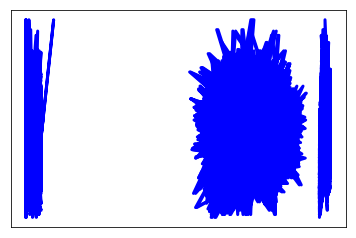

In [18]:
# Plot outputs
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

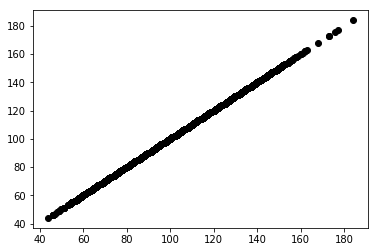

In [19]:
plt.scatter(X_test['score1'], y_test,  color='black')

In [20]:
#Working for team 2 here
# Splitting the data into training and testing sets using sklearn module "train_test_split"

X = final_data.drop(columns=['score1','team1'])
y = final_data['score2']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 0)

In [22]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 9.05074762e-17 -2.07534035e-13  2.14008073e-17  2.61063645e-13
  2.62092760e-13 -1.17547823e-14  1.18015260e-14 -2.61029003e-13
 -2.62139032e-13  1.00000000e+00]
Mean squared error: 0.00
Variance score: 1.00


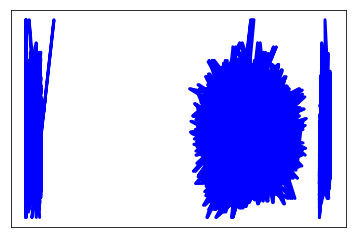

In [23]:
# Plot outputs
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

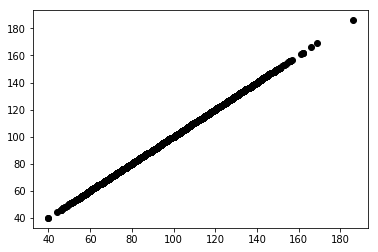

In [24]:
plt.scatter(X_test['score2'], y_test,  color='black')